In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [4]:
company = pd.read_csv('Company_Data.csv')

In [6]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [8]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [9]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [10]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [13]:
# Converting categorical variable into numerical variabl

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labelencoder = LabelEncoder()
company.iloc[:,6] = labelencoder.fit_transform(company.iloc[:,6])

In [16]:
company.iloc[:,6]

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [17]:
#converting sales feature into categorical feature
company['Sales'] = pd.cut(company.Sales,bins=(0,7.49,16.27),labels=['lowsales','highsales'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,highsales,138,73,11,276,120,0,42,17,Yes,Yes
1,highsales,111,48,16,260,83,1,65,10,Yes,Yes
2,highsales,113,35,10,269,80,2,59,12,Yes,Yes
3,lowsales,117,100,4,466,97,2,55,14,Yes,Yes
4,lowsales,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,highsales,138,108,17,203,128,1,33,14,Yes,Yes
396,lowsales,139,23,3,37,120,2,55,11,No,Yes
397,lowsales,162,26,12,368,159,2,40,18,Yes,Yes
398,lowsales,100,79,7,284,95,0,50,12,Yes,Yes


In [18]:
company.isna().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [19]:
company = company.drop(company.index[[174]],axis=0).reset_index()
company.head()

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,highsales,138,73,11,276,120,0,42,17,Yes,Yes
1,1,highsales,111,48,16,260,83,1,65,10,Yes,Yes
2,2,highsales,113,35,10,269,80,2,59,12,Yes,Yes
3,3,lowsales,117,100,4,466,97,2,55,14,Yes,Yes
4,4,lowsales,141,64,3,340,128,0,38,13,Yes,No


In [20]:
company = company.drop(['index'],axis=1)

In [21]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,highsales,138,73,11,276,120,0,42,17,Yes,Yes
1,highsales,111,48,16,260,83,1,65,10,Yes,Yes
2,highsales,113,35,10,269,80,2,59,12,Yes,Yes
3,lowsales,117,100,4,466,97,2,55,14,Yes,Yes
4,lowsales,141,64,3,340,128,0,38,13,Yes,No


In [22]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [23]:
#Creating dummy variables for Urban and US
company2 = pd.get_dummies(company,columns=['Urban','US'])

In [24]:
company2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,highsales,138,73,11,276,120,0,42,17,0,1,0,1
1,highsales,111,48,16,260,83,1,65,10,0,1,0,1
2,highsales,113,35,10,269,80,2,59,12,0,1,0,1
3,lowsales,117,100,4,466,97,2,55,14,0,1,0,1
4,lowsales,141,64,3,340,128,0,38,13,0,1,1,0


In [25]:
company2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    399 non-null    int64   
 2   Income       399 non-null    int64   
 3   Advertising  399 non-null    int64   
 4   Population   399 non-null    int64   
 5   Price        399 non-null    int64   
 6   ShelveLoc    399 non-null    int64   
 7   Age          399 non-null    int64   
 8   Education    399 non-null    int64   
 9   Urban_No     399 non-null    uint8   
 10  Urban_Yes    399 non-null    uint8   
 11  US_No        399 non-null    uint8   
 12  US_Yes       399 non-null    uint8   
dtypes: category(1), int64(8), uint8(4)
memory usage: 27.1 KB


In [26]:
x = company2.iloc[:,1:]
y = company2.iloc[:,0]

In [27]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## VISUALIZATION

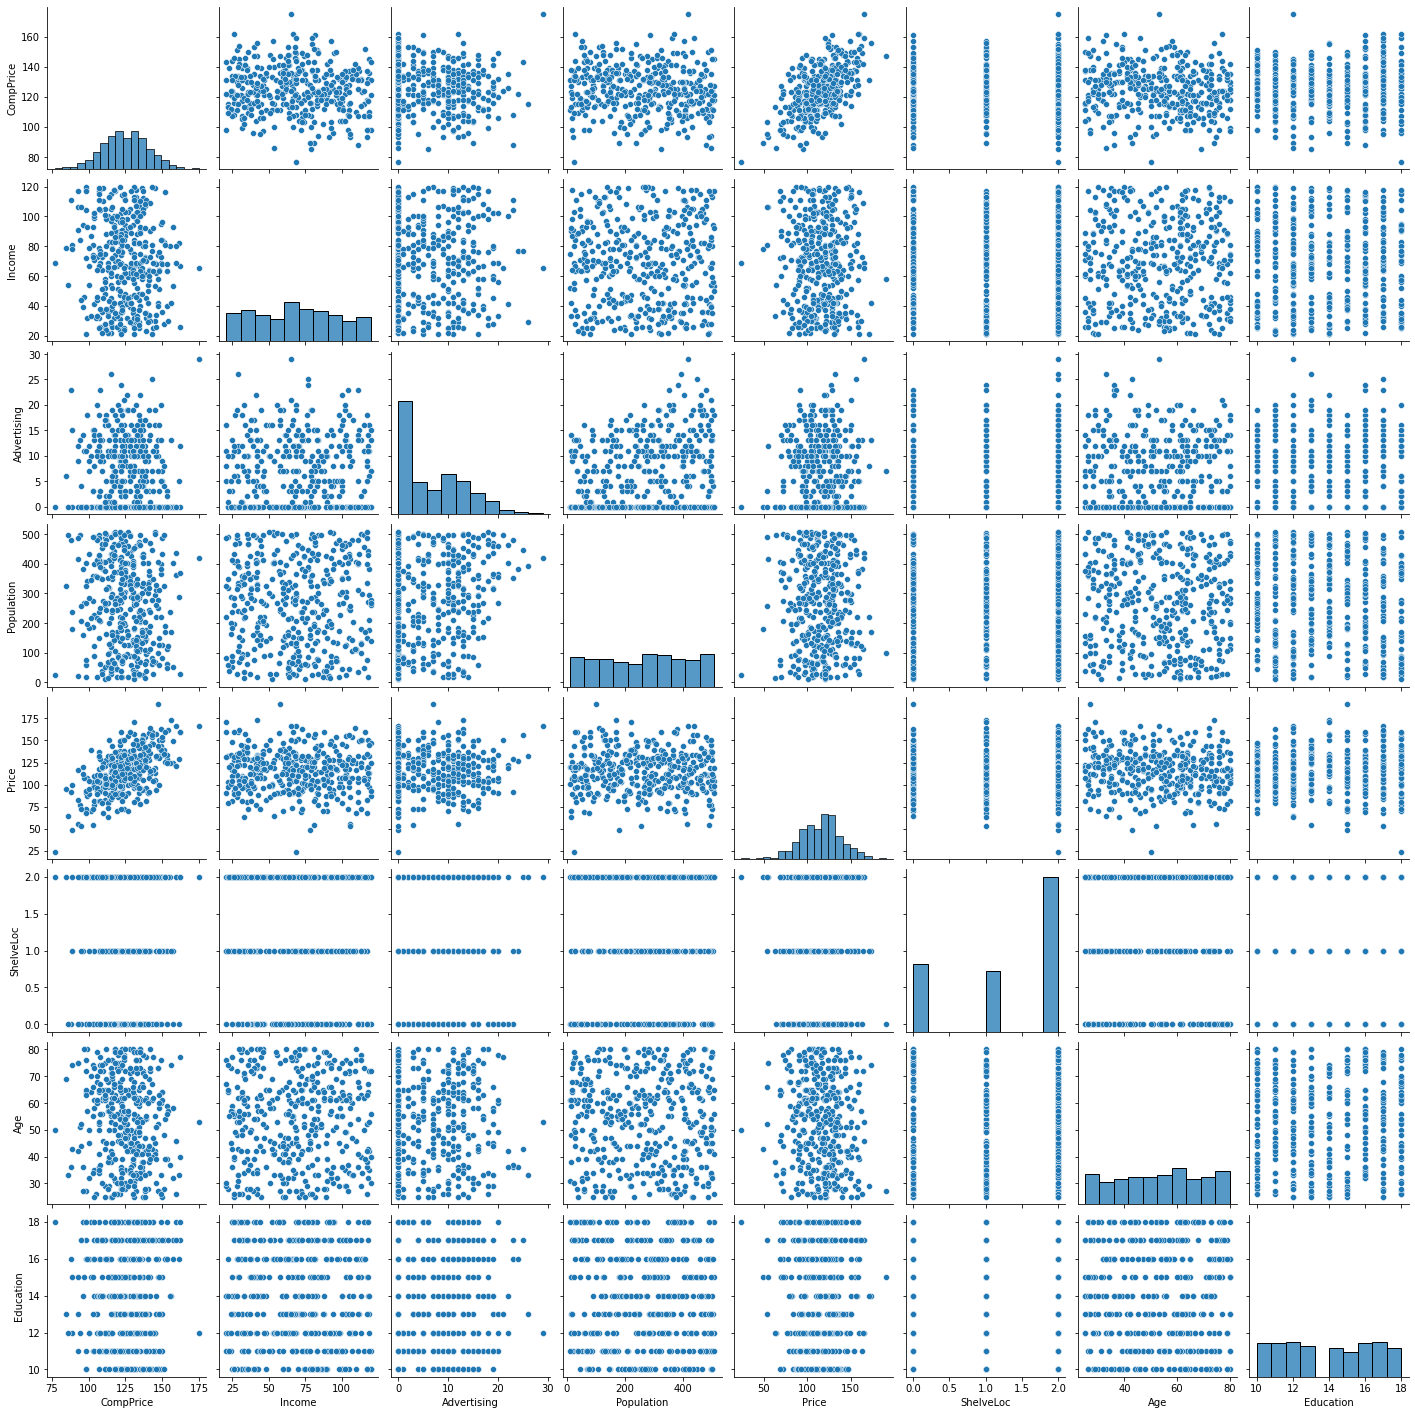

In [28]:
sns.pairplot(company)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


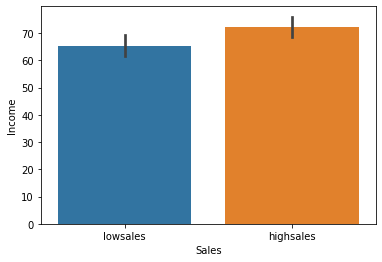

In [29]:
sns.barplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


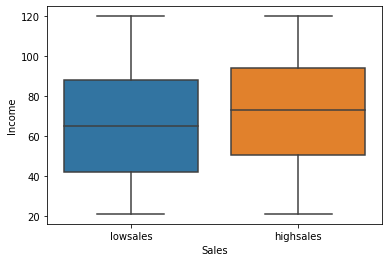

In [30]:
sns.boxplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


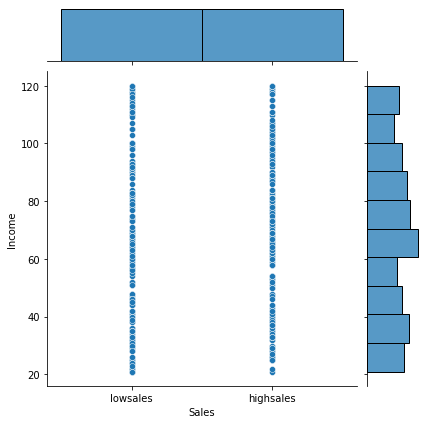

In [31]:
sns.jointplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


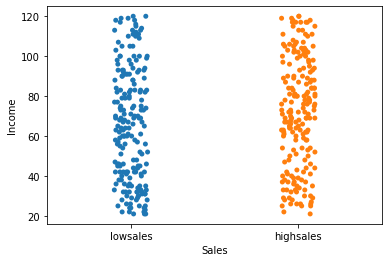

In [32]:
sns.stripplot(company['Sales'], company['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


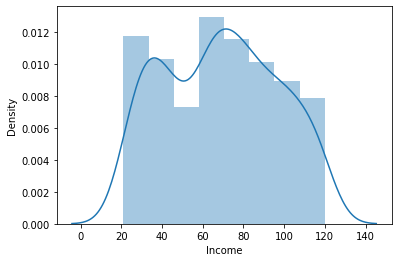

In [33]:
sns.distplot(company['Income'])

## RANDOM FOREST CLASSIFIER USING K-FOLD

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
num_trees = 200
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #Bootstrap

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7942948717948719


## ADABOOST CLASSIFIER

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
num_trees = 200
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8321153846153846


## HYPERPARAMETER TUNNING

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [40]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [41]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [42]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 4.82 s, sys: 244 ms, total: 5.06 s
Wall time: 1min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [43]:
grid_search.best_score_

0.8119857594936709

In [44]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [45]:
rf_best.feature_importances_

array([0.10557232, 0.07744842, 0.12866985, 0.06205945, 0.28281138,
       0.12539308, 0.15238318, 0.03450636, 0.00661441, 0.00548245,
       0.00904942, 0.01000968])

In [46]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_
})

In [47]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,Price,0.282811
6,Age,0.152383
2,Advertising,0.128670
5,ShelveLoc,0.125393
0,CompPrice,0.105572
1,Income,0.077448
3,Population,0.062059
7,Education,0.034506
11,US_Yes,0.010010
10,US_No,0.009049


## RANDOM FOREST USING BEST HYPERPARAMETERS AND TRAIN-TEST SPLIT

In [63]:
model2 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_jobs=-1, max_depth=10,
                                       n_estimators=200, oob_score=True)

In [64]:
%%time
model2.fit(x_train, y_train)

CPU times: user 522 ms, sys: 52 ms, total: 574 ms
Wall time: 546 ms


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [65]:
# checking the oob score
model2.oob_score_

0.8150470219435737

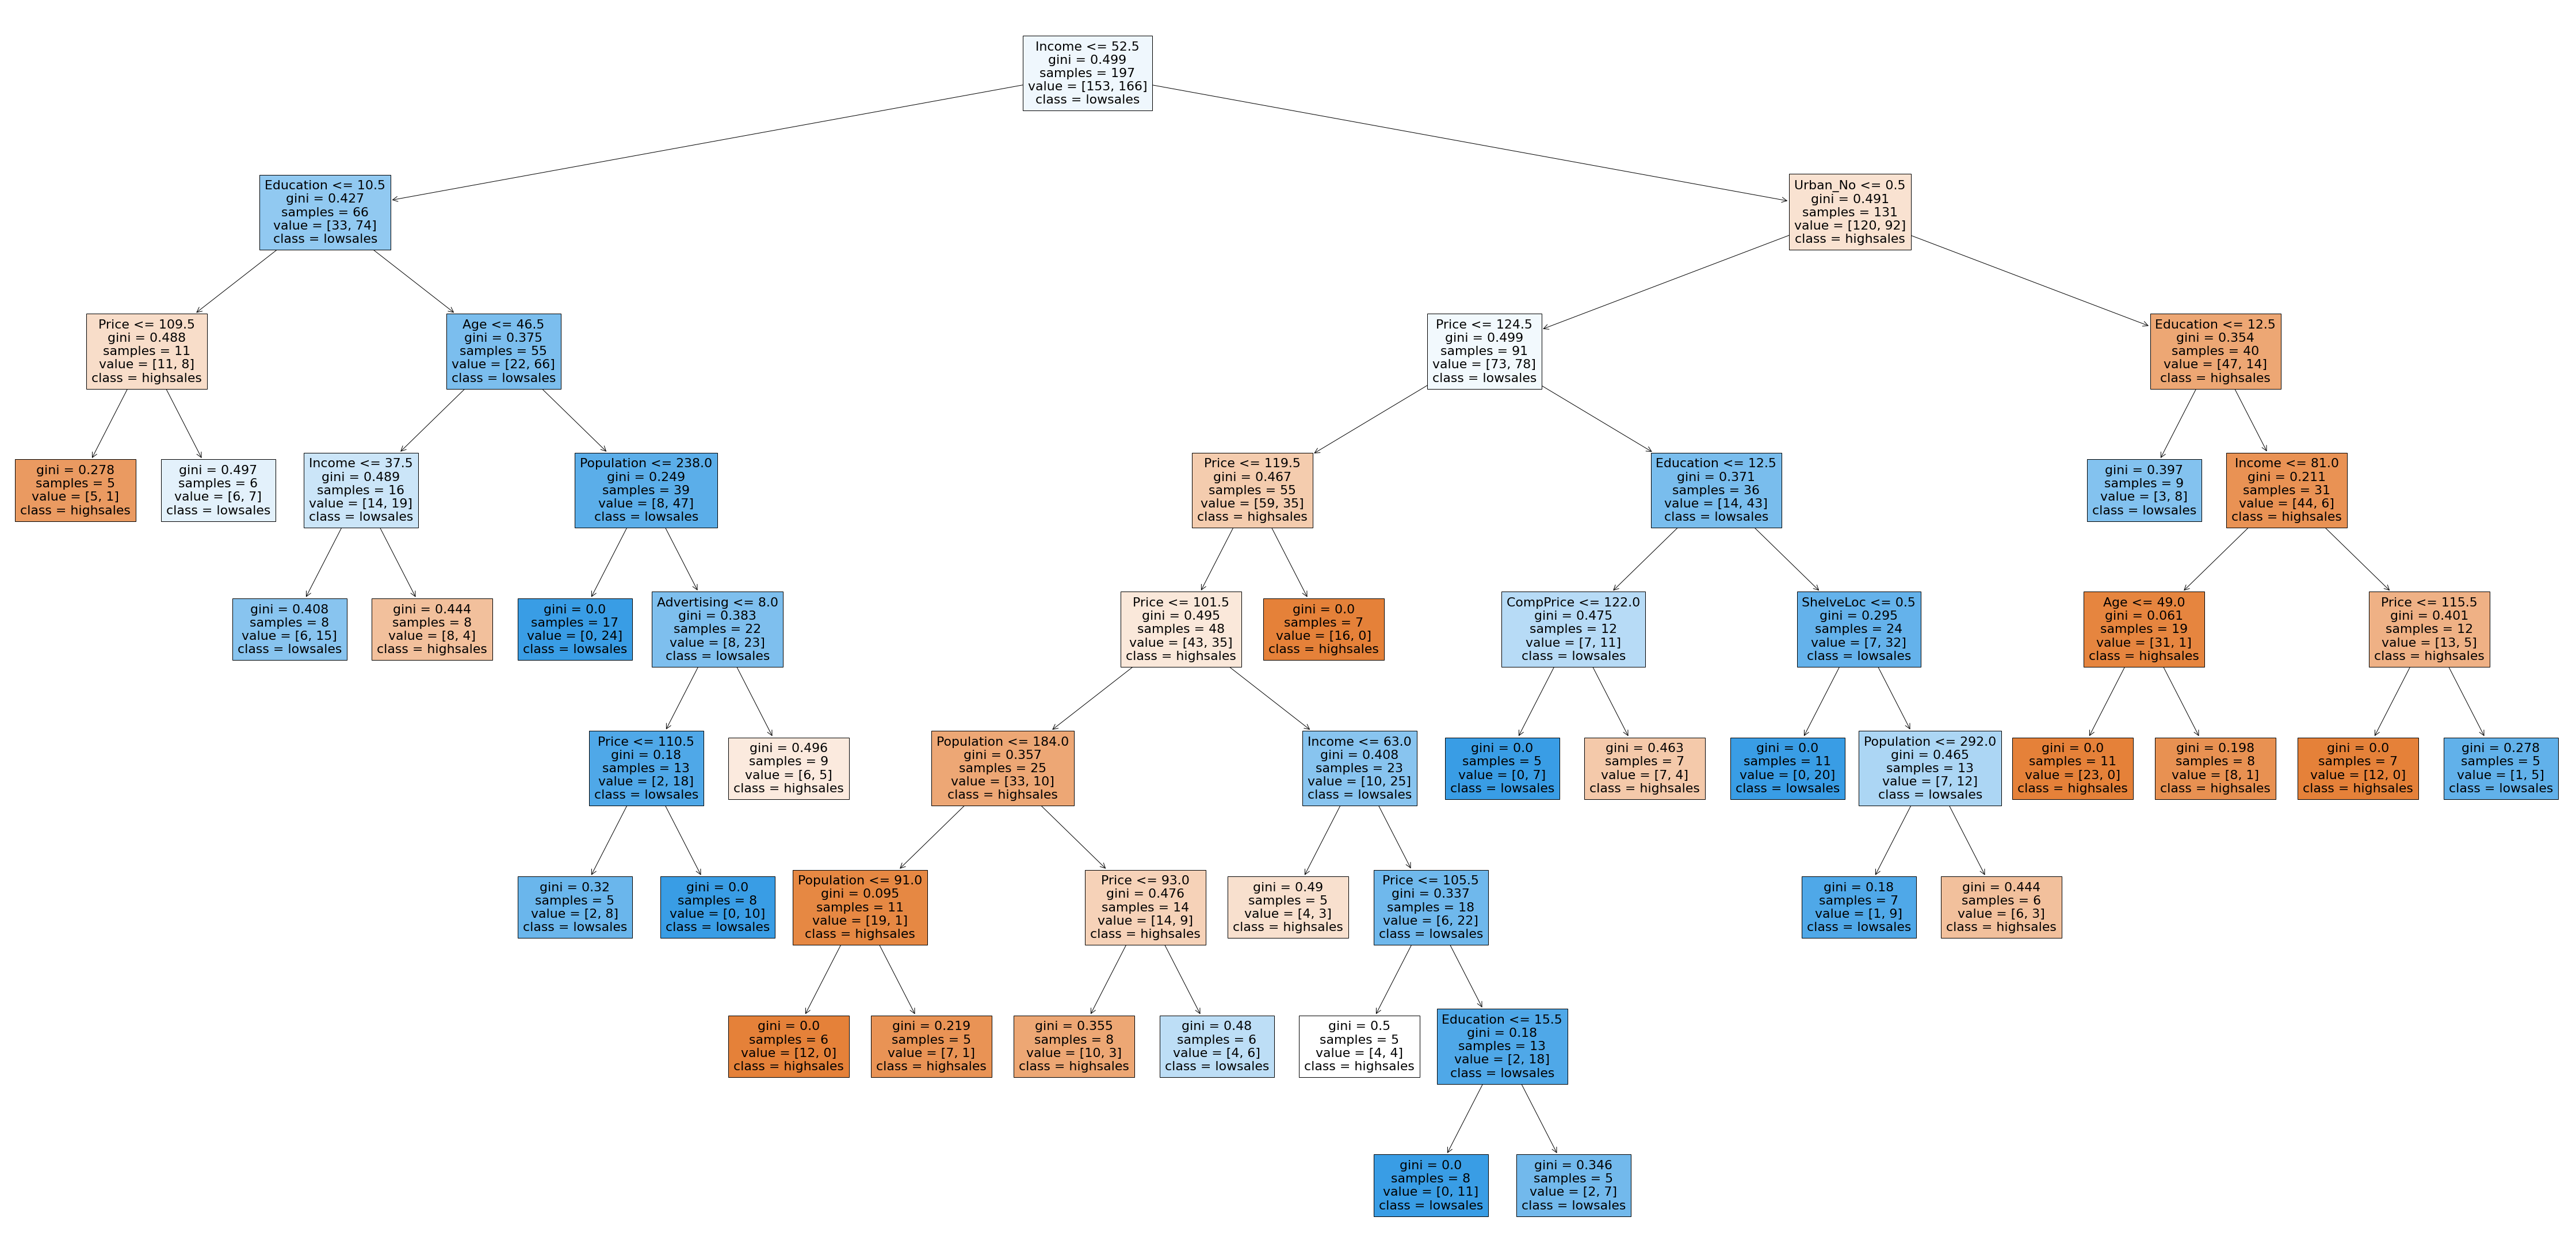

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['highsales', "lowsales"],filled=True);

## GRADIENT BOOSTING CLASSIFIER

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gr_model =GradientBoostingClassifier()

In [69]:
gr_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [70]:
results = cross_val_score(gr_model, x, y, cv=kfold)
print(results.mean())

0.8271153846153846


### RANDOM FOREST WITH ADABOOST AS AN ENSEMBLE TECHNIQUE GIVES HIGHEST ACCURACY

## Overcoming Class Imbalance using SMOTE Techniques

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
x_smote, y_smote = smote.fit_resample(x,y)
y_smote.value_counts()
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(x_smote,y_smote, test_size = 0.20,random_state = 7)
# rf.fit(x_train_smote,y_train_smote)
# y_pred_smote = rf.predict(x_train_smote)
# y_test_pred_smote = rf.predict(x_test_smote)
# confusion_matrix(y_test_smote, y_test_pred_smote)
# confusion_matrix(y_train_smote, y_pred_smote)
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train_smote)
x_test_scaled = preprocessing.scale(x_test_smote)

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
rf.fit(x_train_scaled,y_train_smote)
y_pred_scaled = rf.predict(x_train_scaled)
y_test_pred_scaled = rf.predict(x_test_scaled)
confusion_matrix(y_test_smote, y_test_pred_scaled)
np.mean(y_test_smote == y_test_pred_scaled)
cls_report = pd.DataFrame(classification_report(y_test_pred_scaled, y_test_smote, output_dict=(True)))

In [59]:
cls_report 

,highsales,lowsales,accuracy,macro avg,weighted avg
precision,0.731707,0.820513,0.775,0.776110,0.779440
recall,0.810811,0.744186,0.775,0.777498,0.775000
f1-score,0.769231,0.780488,0.775,0.774859,0.775281
support,37.000000,43.000000,0.775,80.000000,80.000000
